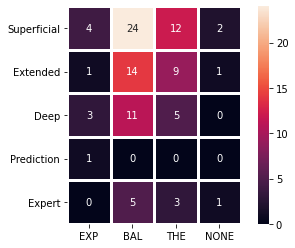

In [2]:
# create imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tools import utils, ml_tools, formats
import numpy as np

In [3]:
import matplotlib
import scienceplots
plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

In [4]:
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')
#print(df['Content'])

In [4]:
# Visualising the pre-processed text
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
#filepath = 'outputs/comparison-{}-2500epochs-overallgraph.png'.format('ml')

#---- why the word map--- 
'''
Allows us to perform exploratory analysis. This helps us know the most commmon words available/
'''

'\nAllows us to perform exploratory analysis. This helps us know the most commmon words available/\n'

In [5]:
# ---- NB --------
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

# arr1 = nb_unpickled_df['accuracy'][0]
train_sizes = [0.5,0.6,0.7,0.8,0.9]
c = ['r','b','g', 'm']

In [6]:
def ml_results_graph(train_size, df, mlmodel):
    for i in range(4):
        # all of the arrays will be of size 4 for training size graphs anyway
        plt.plot(train_size,df['accuracy'][i], label = '{}-{}-{}'.format(mlmodel,df['feature extraction'][i],df['Label'][i]), color =c[i],marker='o', markersize =2 )
        #plt.scatter(train_size, df['accuracy'][i], 'o', color = c[i])
        plt.errorbar(train_sizes, df['accuracy'][i], yerr = df['sem'][i], elinewidth=0.5, capsize=1, c = c[i])
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')
    plt.legend( prop={'size': 3})
    filepath = 'outputs/comparison-{}-2500epochs-overallgraph.png'.format(mlmodel)
    #plt.savefig(filepath)
    return 




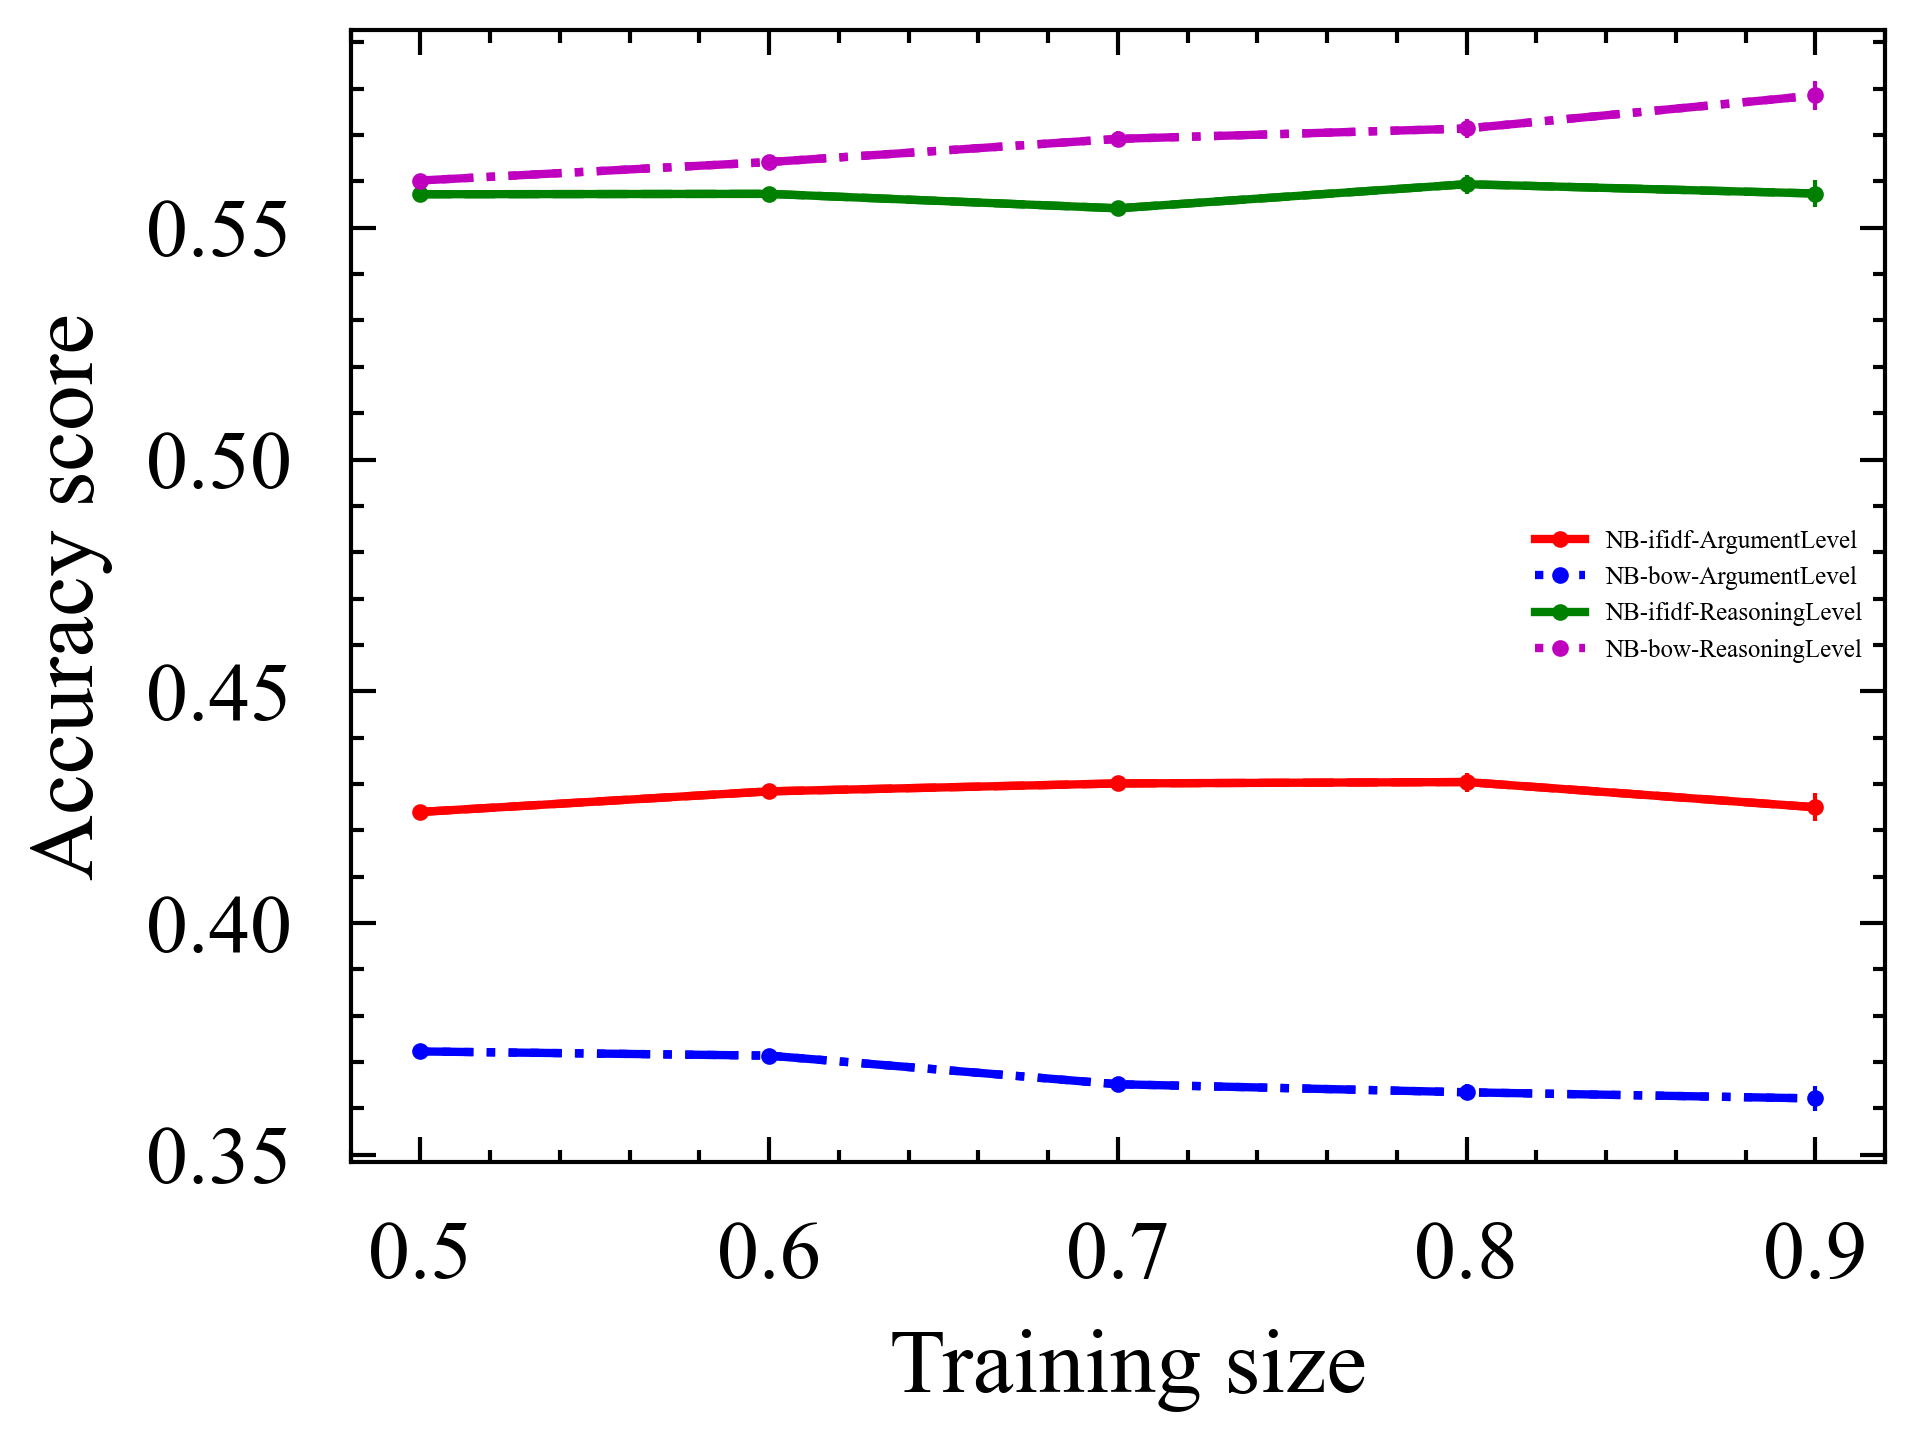

In [40]:
nb_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
nbgraph = ml_results_graph(train_sizes, nb_unpickled_df, 'NB')

In [39]:
nbh_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_arraystopandas_freqhist_2500epochs', dir_name_e)


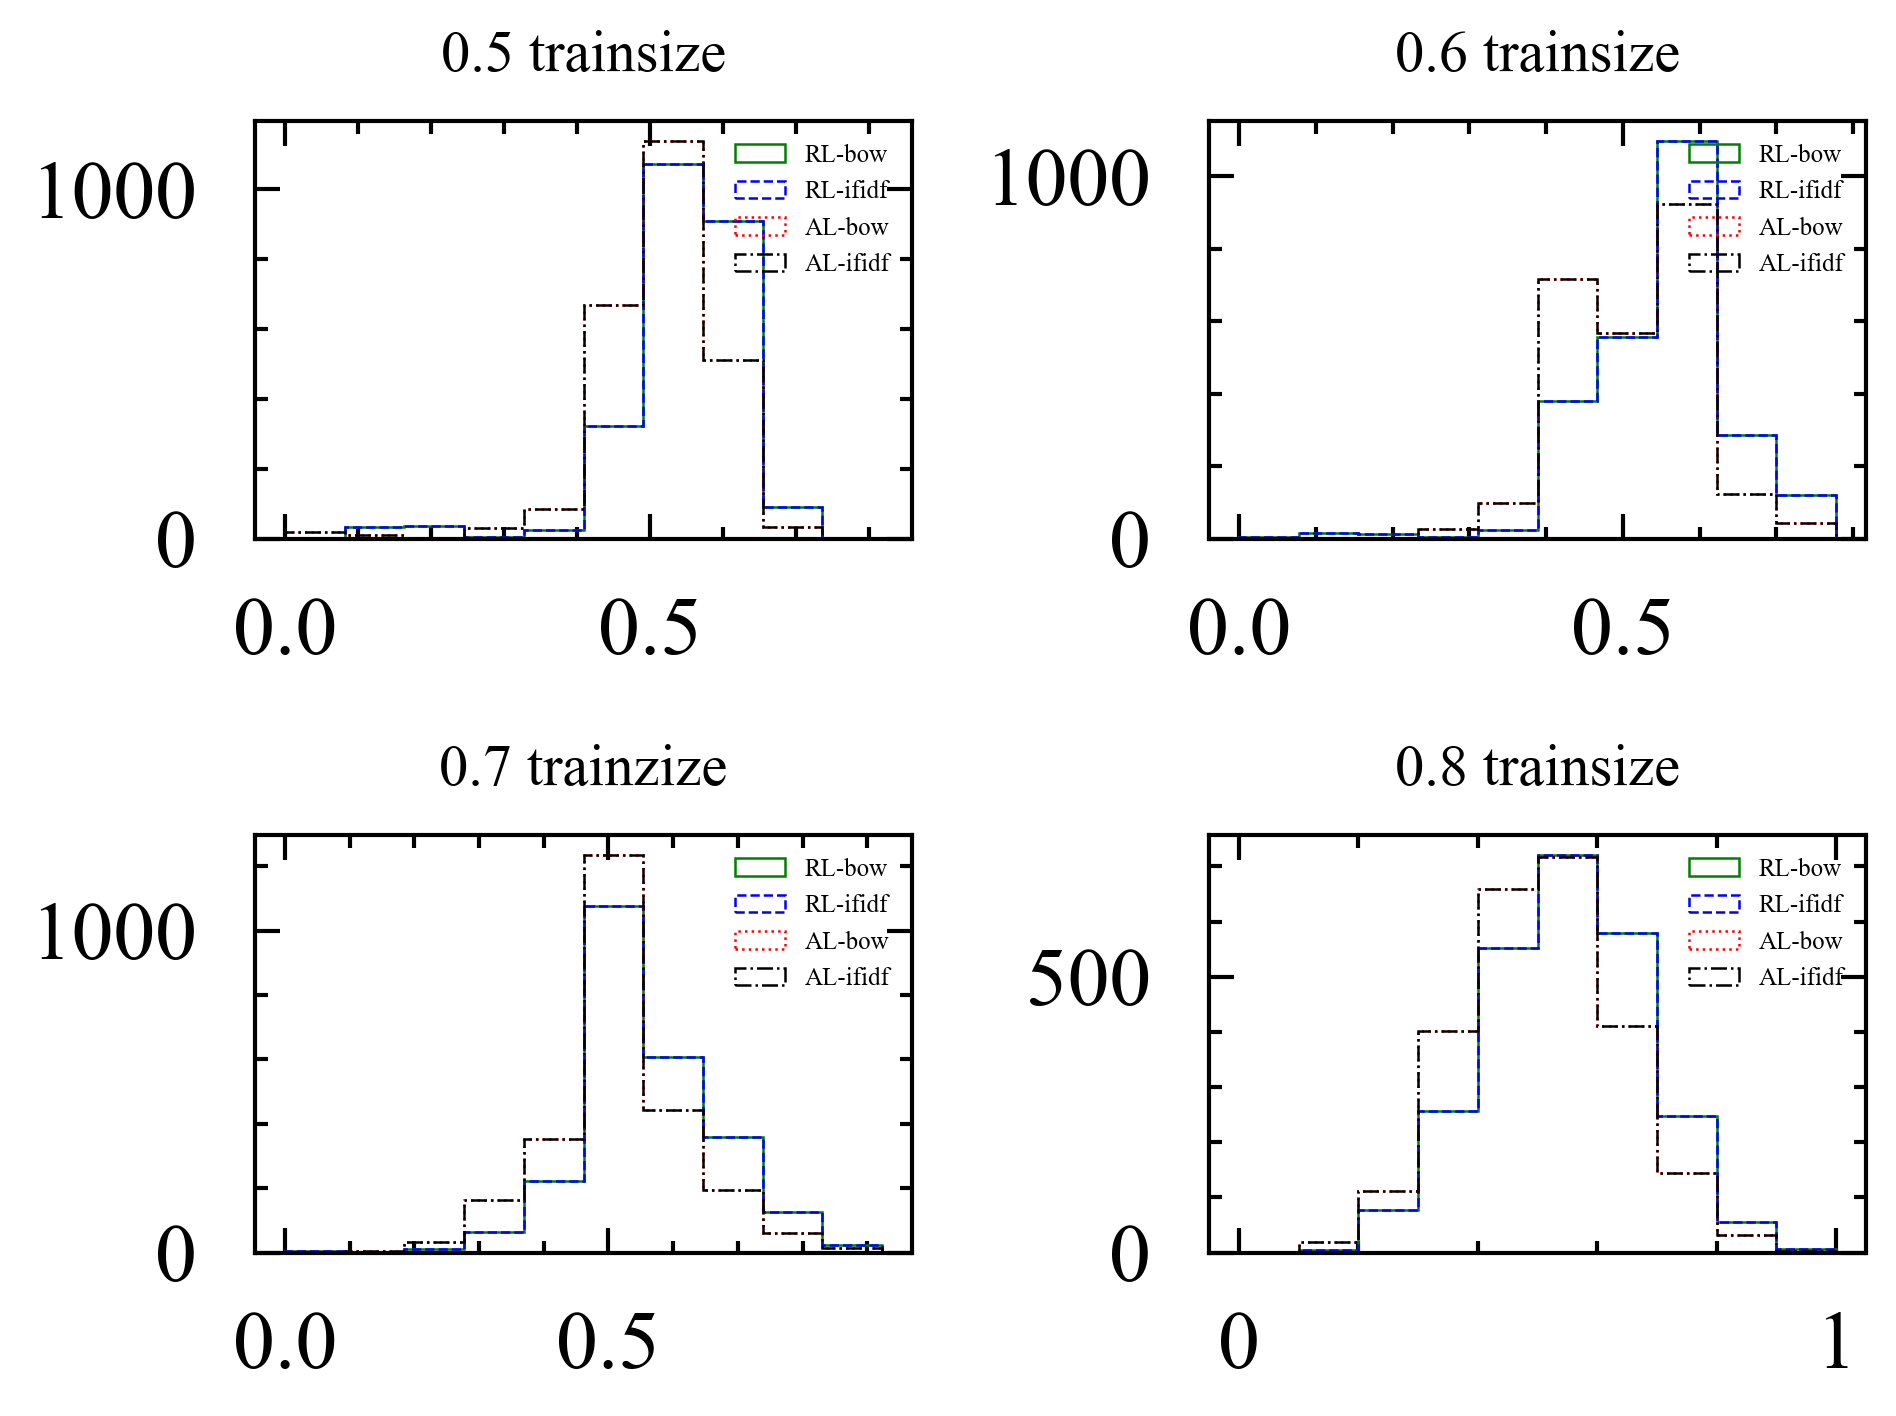

In [41]:
num_epochs = 2500
tsizes_str = ['0.5','0.6','0.7','0.8','0.9']
ft_ext     = ['AL-ifidf', 'AL-bow', 'RL-ifidf', 'RL-bow']
n_bins = 10
x_5 = []
x_6 = []
x_7 = []
x_8 = []
x_9 = []
# for size in tsizes_str:
#     for cell in range(len(nbh_unpickled_df[size])) :
#         #filepath = 'outputs/{}-NB2-{}epochs-freq histograms-{}.png'.format(num_epochs,size,ft_ext[cell]) # ** always change name **
#         #formats.histogram(nbh_unpickled_df[size][cell], 'Accuracy', 'Frequency', filepath, size)
#         #plt.hist(nbh_unpickled_df[size])

for size in tsizes_str:
    for cell in range(len(nbh_unpickled_df[size])):
        if size == '0.5':
            x_5.append(nbh_unpickled_df[size][cell])
        if size == '0.6':
            x_6.append(nbh_unpickled_df[size][cell])
        if size == '0.7':
            x_7.append(nbh_unpickled_df[size][cell])
        if size == '0.8':
            x_8.append(nbh_unpickled_df[size][cell])
        if size == '0.9':
            x_9.append(nbh_unpickled_df[size][cell])

fig, axes = plt.subplots(2,2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime', 'magenta']

ax0.hist(x_5, n_bins, histtype='step', fill=False, label=ft_ext)
ax0.legend(prop={'size': 3})
ax0.set_title('0.5 trainsize', fontsize = 7)


ax1.hist(x_6, n_bins,  histtype='step', fill=False, label=ft_ext)
ax1.legend(prop={'size': 3})
ax1.set_title('0.6 trainsize', fontsize = 7)

ax2.hist(x_7, n_bins, histtype='step',  fill=False,label=ft_ext)
ax2.legend(prop={'size': 3})
ax2.set_title('0.7 trainzize',fontsize = 7)


ax3.hist(x_8, n_bins,  histtype='step',fill=False,label=ft_ext)
ax3.legend(prop={'size': 3})
ax3.set_title('0.8 trainsize', fontsize = 7)

# ax4.subplot(1,1)
# ax4.hist(x_9, n_bins,  histtype='step', stacked=True, fill=False,label=ft_ext)
# ax4.legend(prop={'size': 3})
# ax4.set_title('0.9 trainsize', fontsize = 7)

fig.tight_layout()
plt.show()


2500


(array([[1.900e+01, 1.000e+01, 1.000e+00, 3.100e+01, 8.600e+01, 6.700e+02,
         1.139e+03, 5.120e+02, 3.200e+01, 0.000e+00],
        [1.900e+01, 1.000e+01, 1.000e+00, 3.100e+01, 8.600e+01, 6.700e+02,
         1.139e+03, 5.120e+02, 3.200e+01, 0.000e+00],
        [0.000e+00, 3.400e+01, 3.700e+01, 6.000e+00, 2.500e+01, 3.220e+02,
         1.074e+03, 9.090e+02, 9.200e+01, 1.000e+00],
        [0.000e+00, 3.400e+01, 3.700e+01, 6.000e+00, 2.500e+01, 3.220e+02,
         1.074e+03, 9.090e+02, 9.200e+01, 1.000e+00]]),
 array([0.        , 0.08181818, 0.16363636, 0.24545455, 0.32727273,
        0.40909091, 0.49090909, 0.57272727, 0.65454545, 0.73636364,
        0.81818182]),
 <a list of 4 BarContainer objects>)

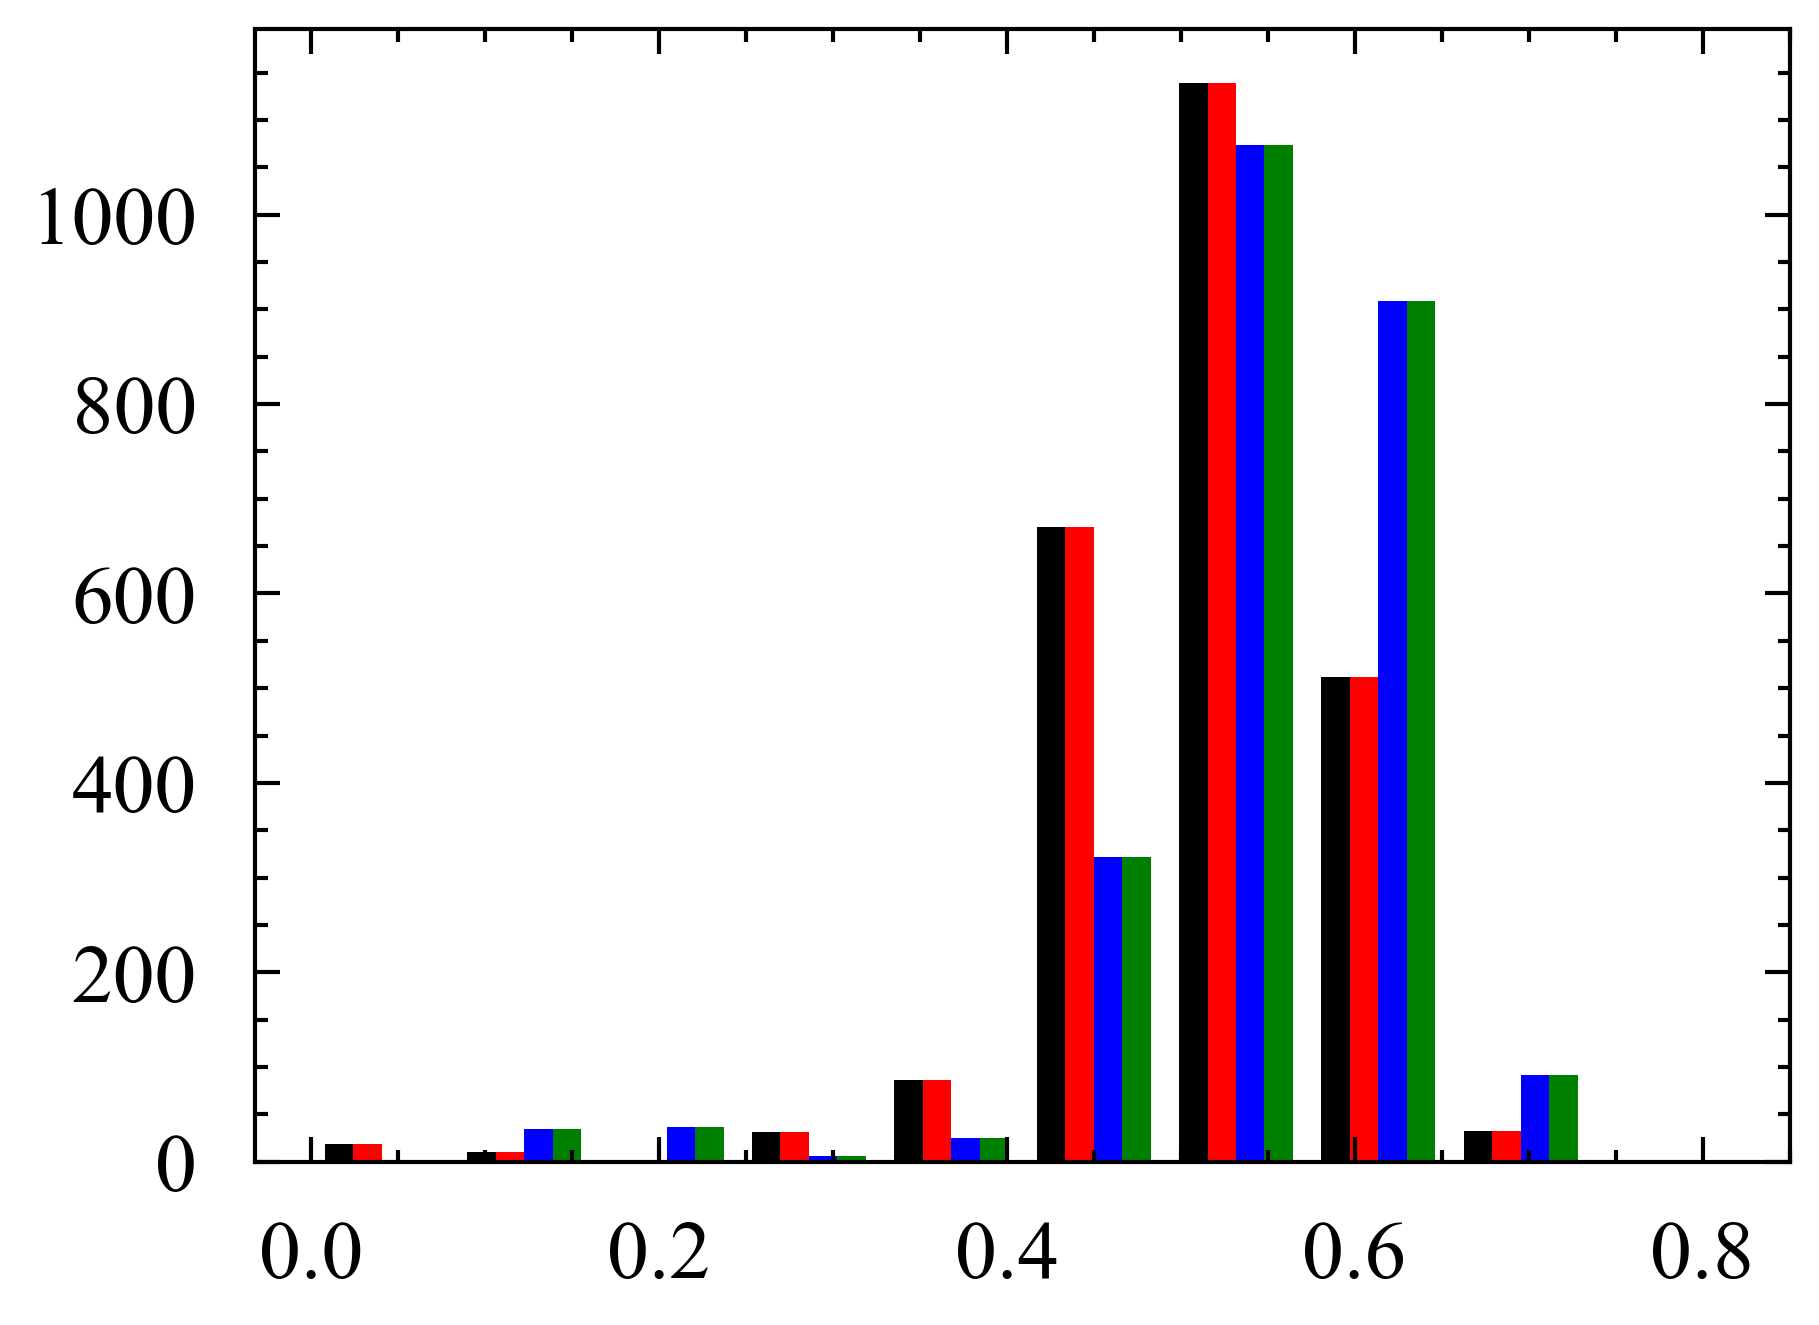

In [36]:
print(len(x_5[0]))
plt.hist(x_5)

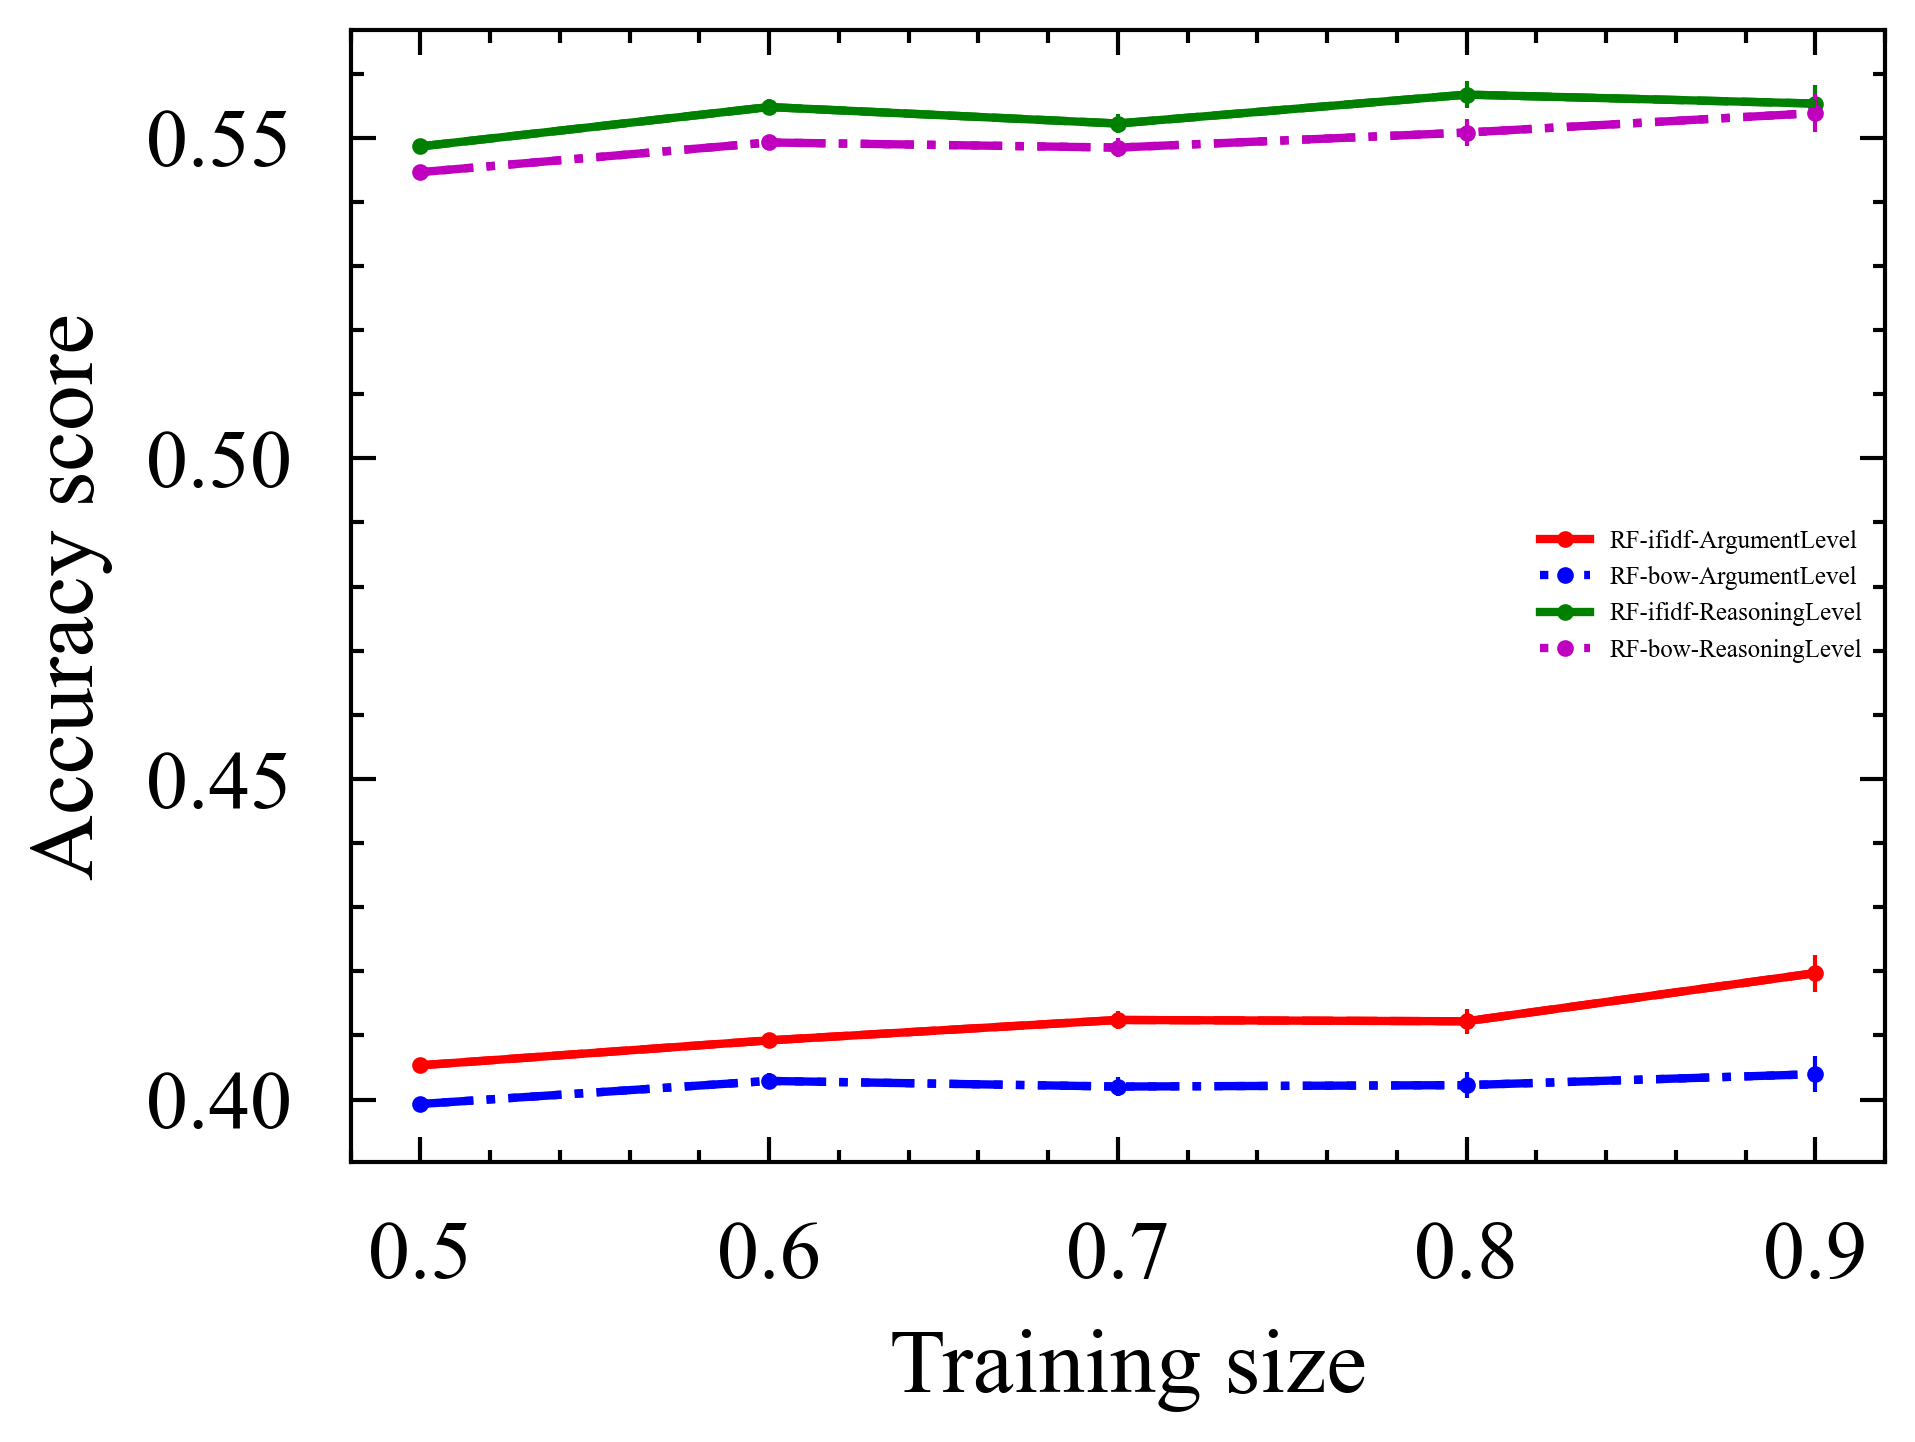

In [89]:
rf_unpickled_df = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
rfgraph = ml_results_graph(train_sizes, rf_unpickled_df, 'RF')

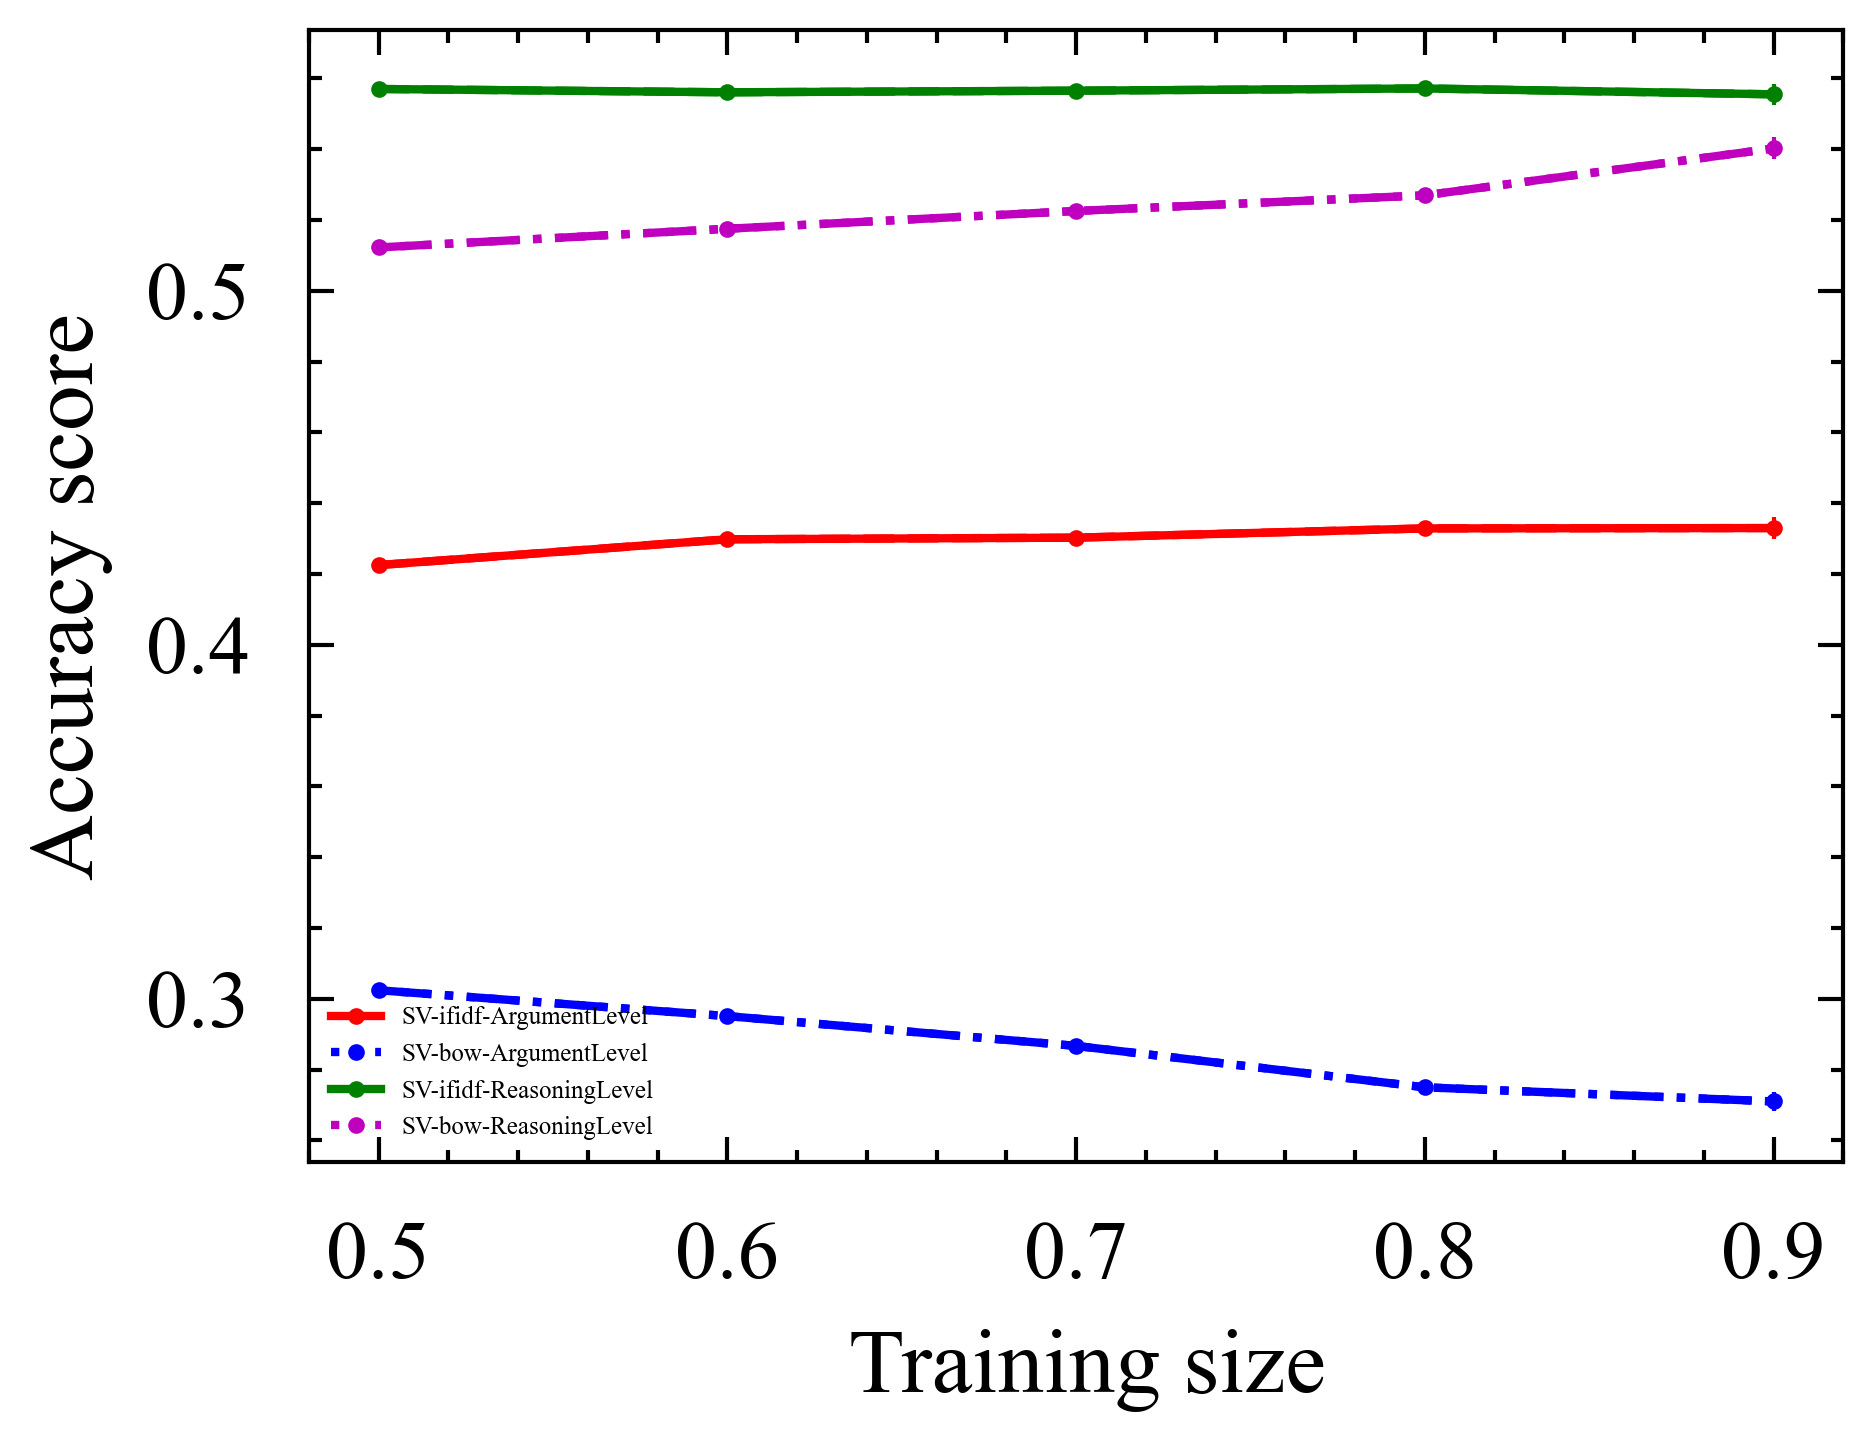

In [90]:
svm_unpickled_df = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
svmgraph = ml_results_graph(train_sizes, svm_unpickled_df, 'SV')

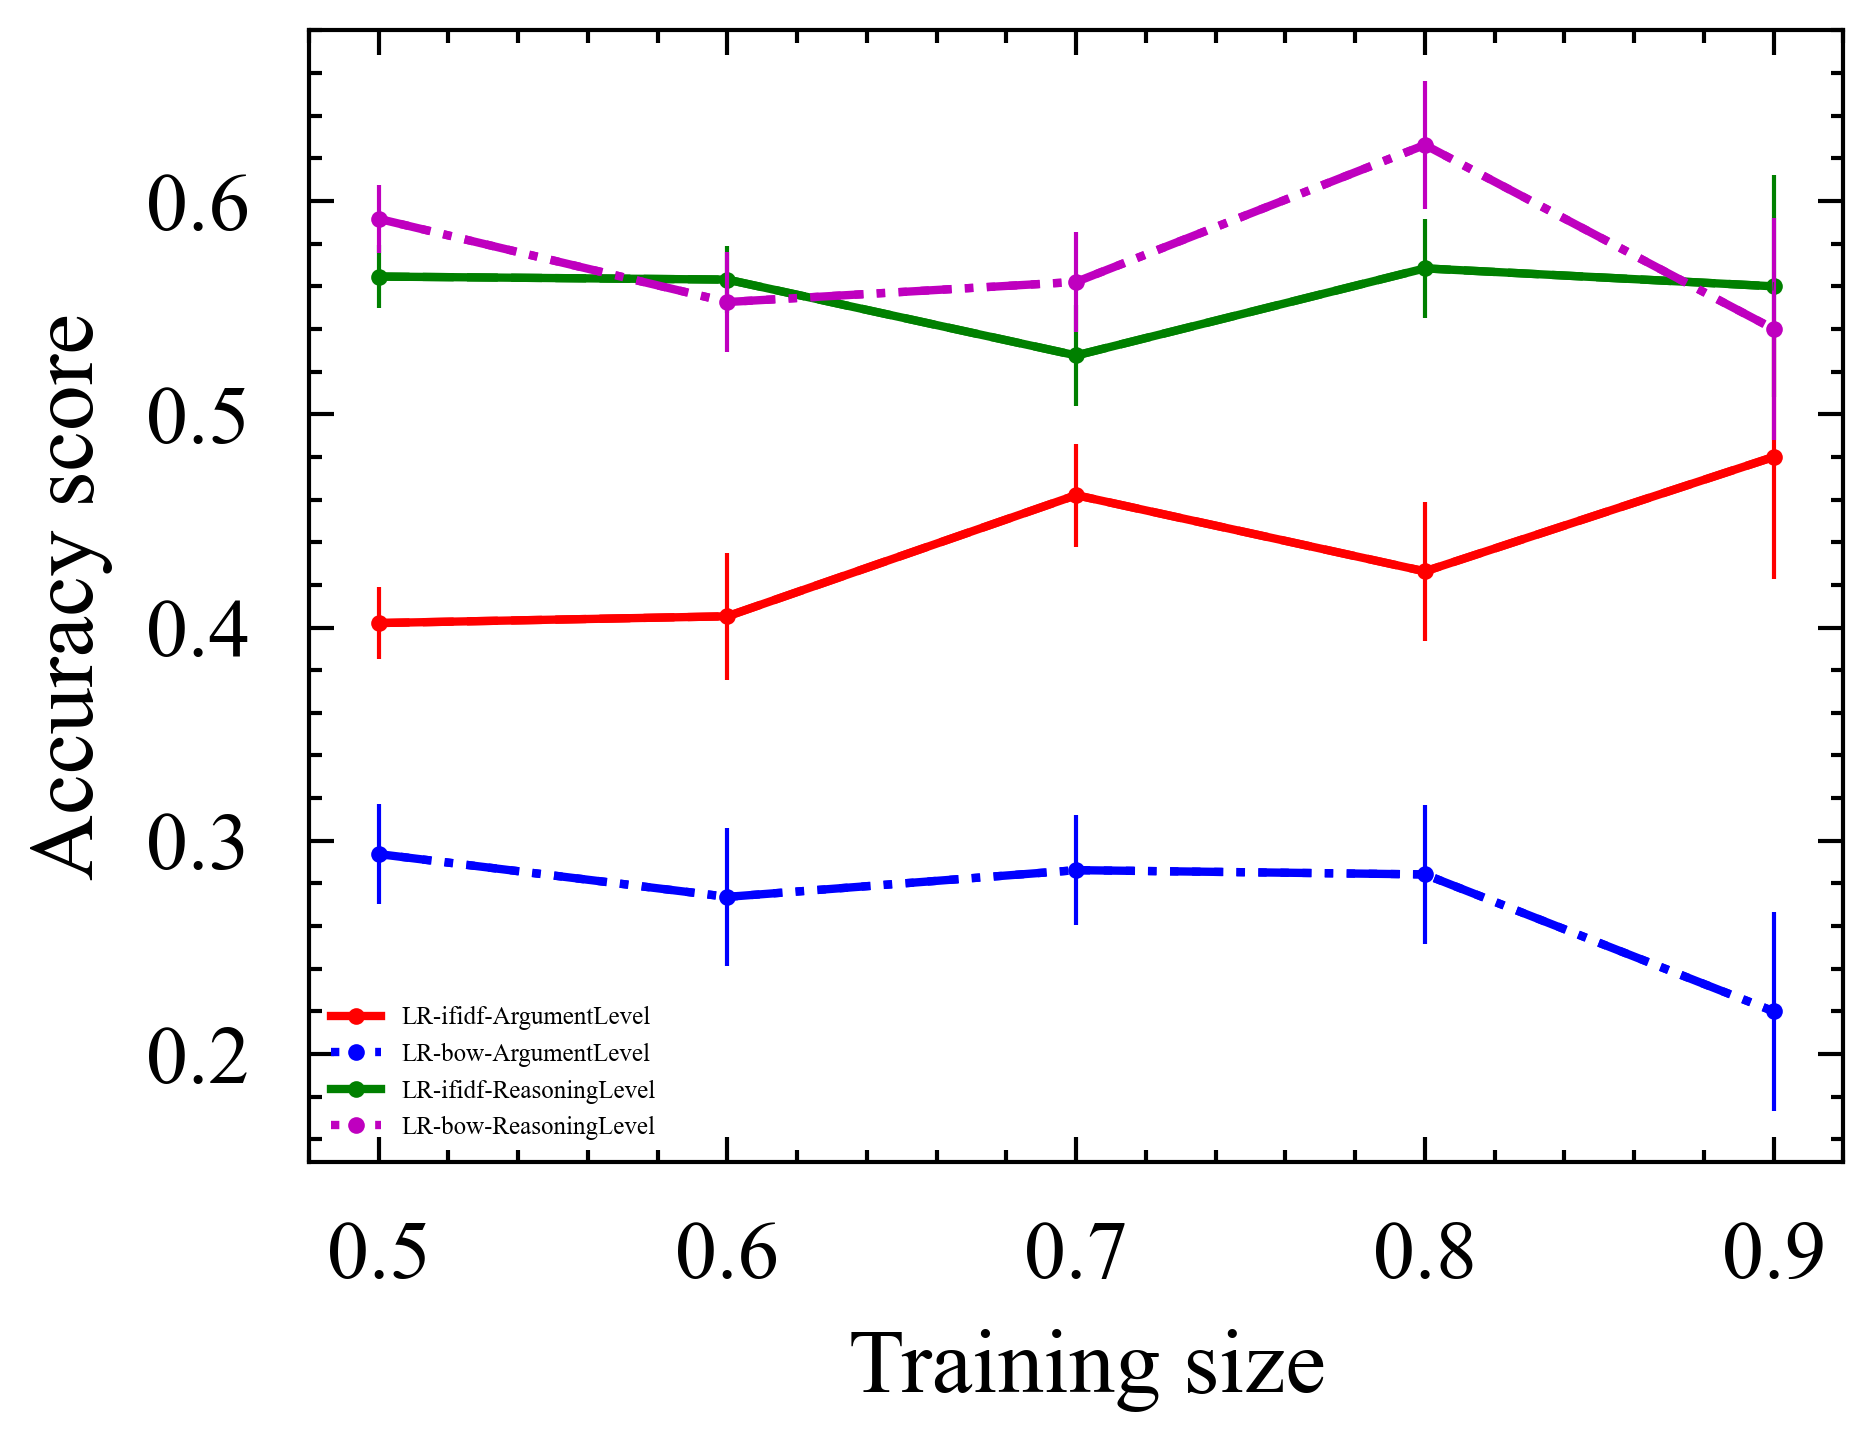

In [91]:
lr_unpickled_df = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y1c1c2_sem', dir_name_e)
lrgraph = ml_results_graph(train_sizes, lr_unpickled_df, 'LR')

Text(0, 0.5, 'Accuracy score')

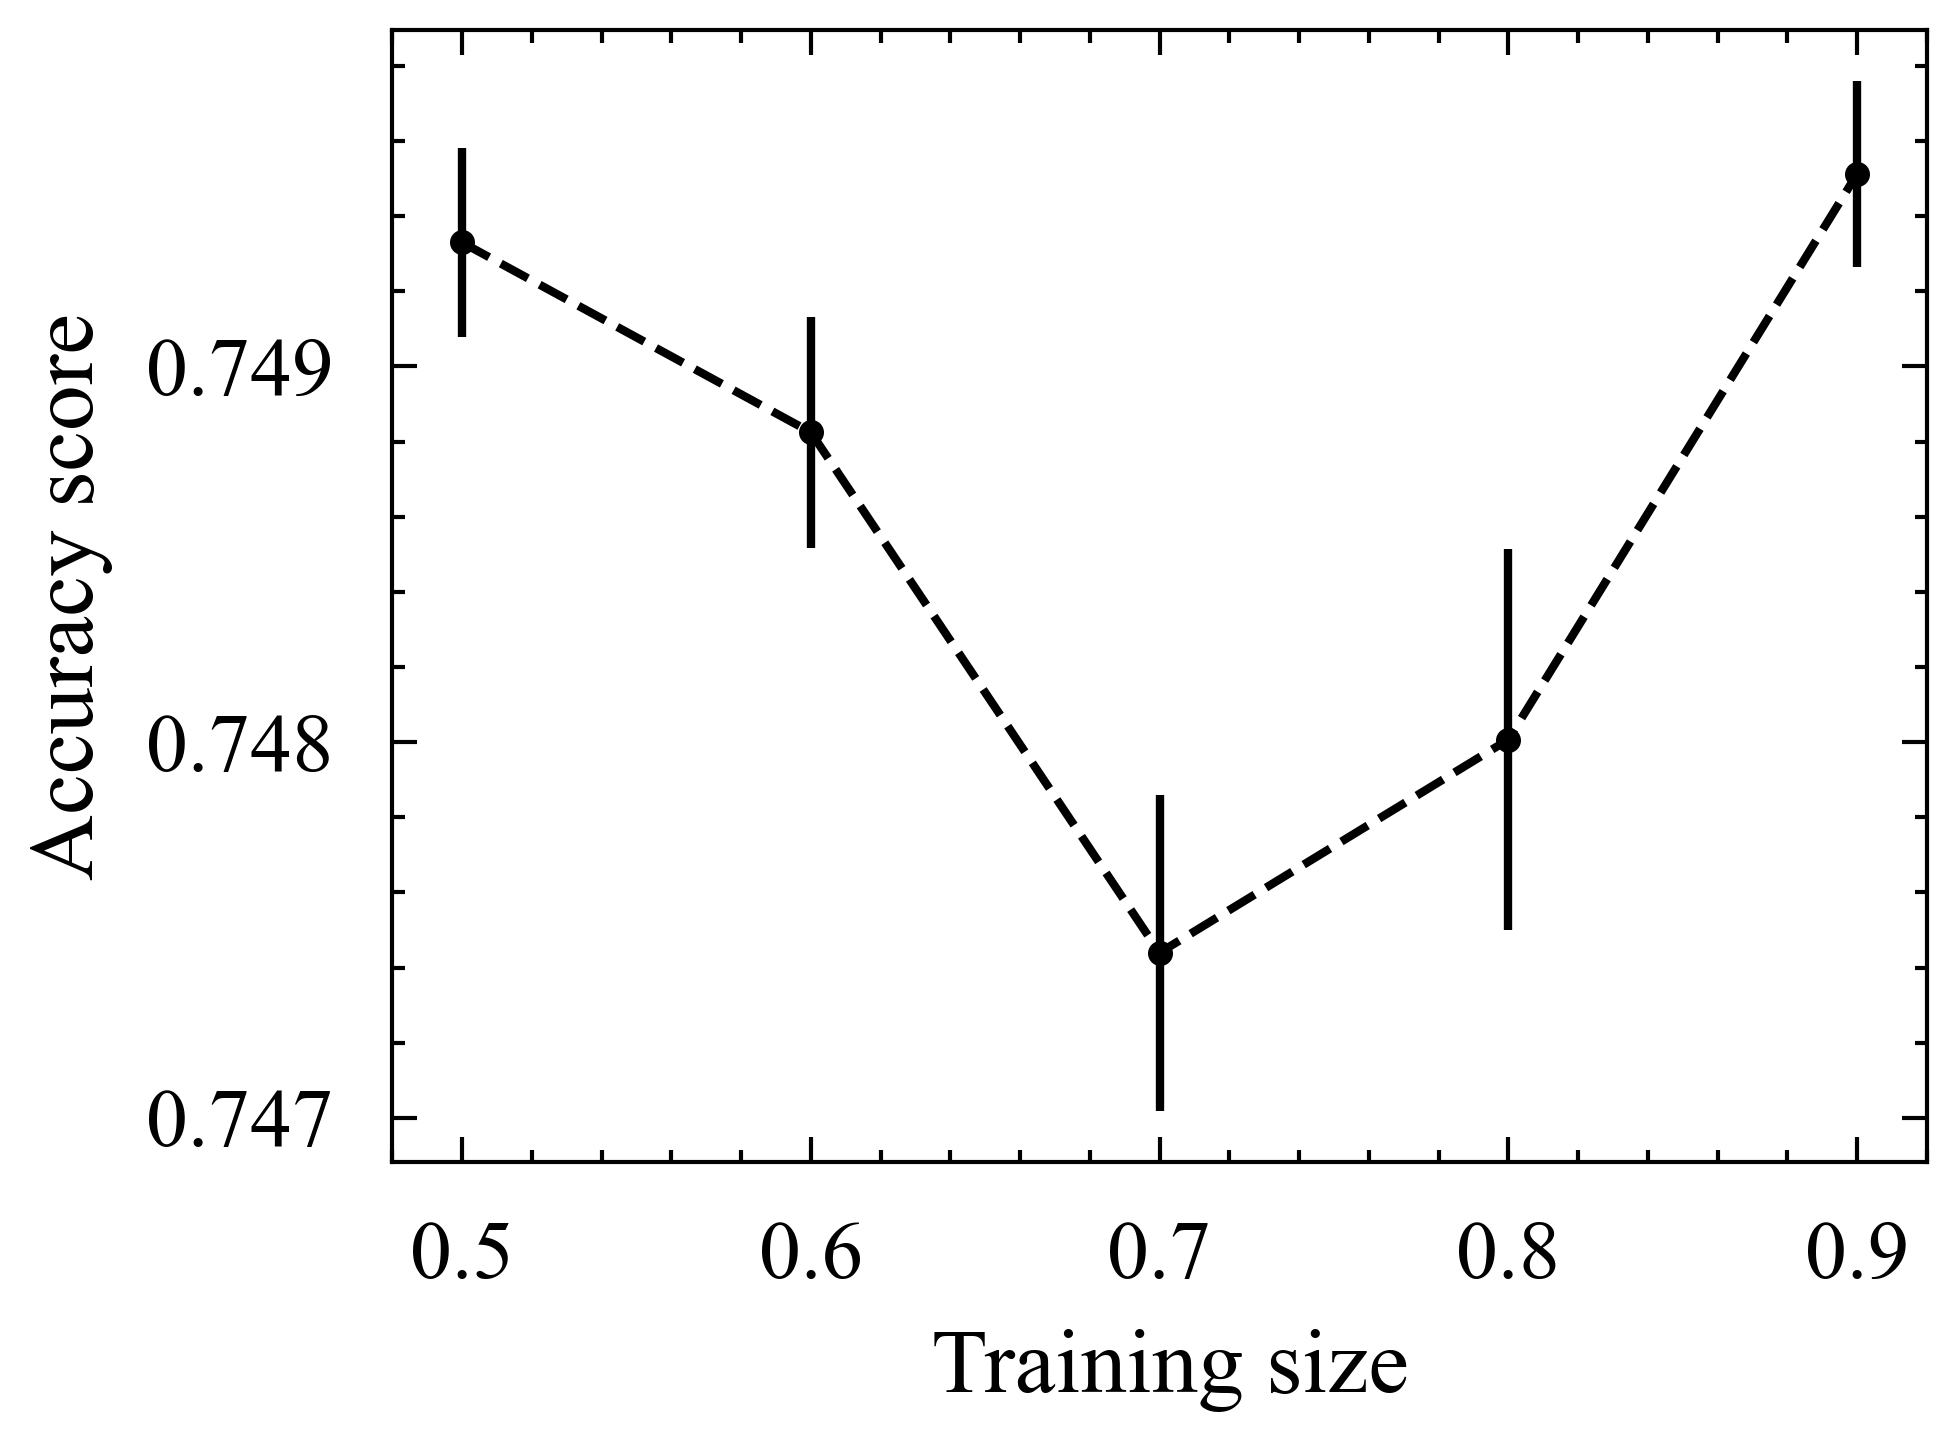

In [94]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL-BOW
#===========================================================================================================================================
unpickled_rl_bow_df = utils.load_pickle_file_to_df('NN_bow_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)
plt.plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], 'o', markersize= 3)
plt.errorbar(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], elinewidth=1, color = 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# save figure 
# filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

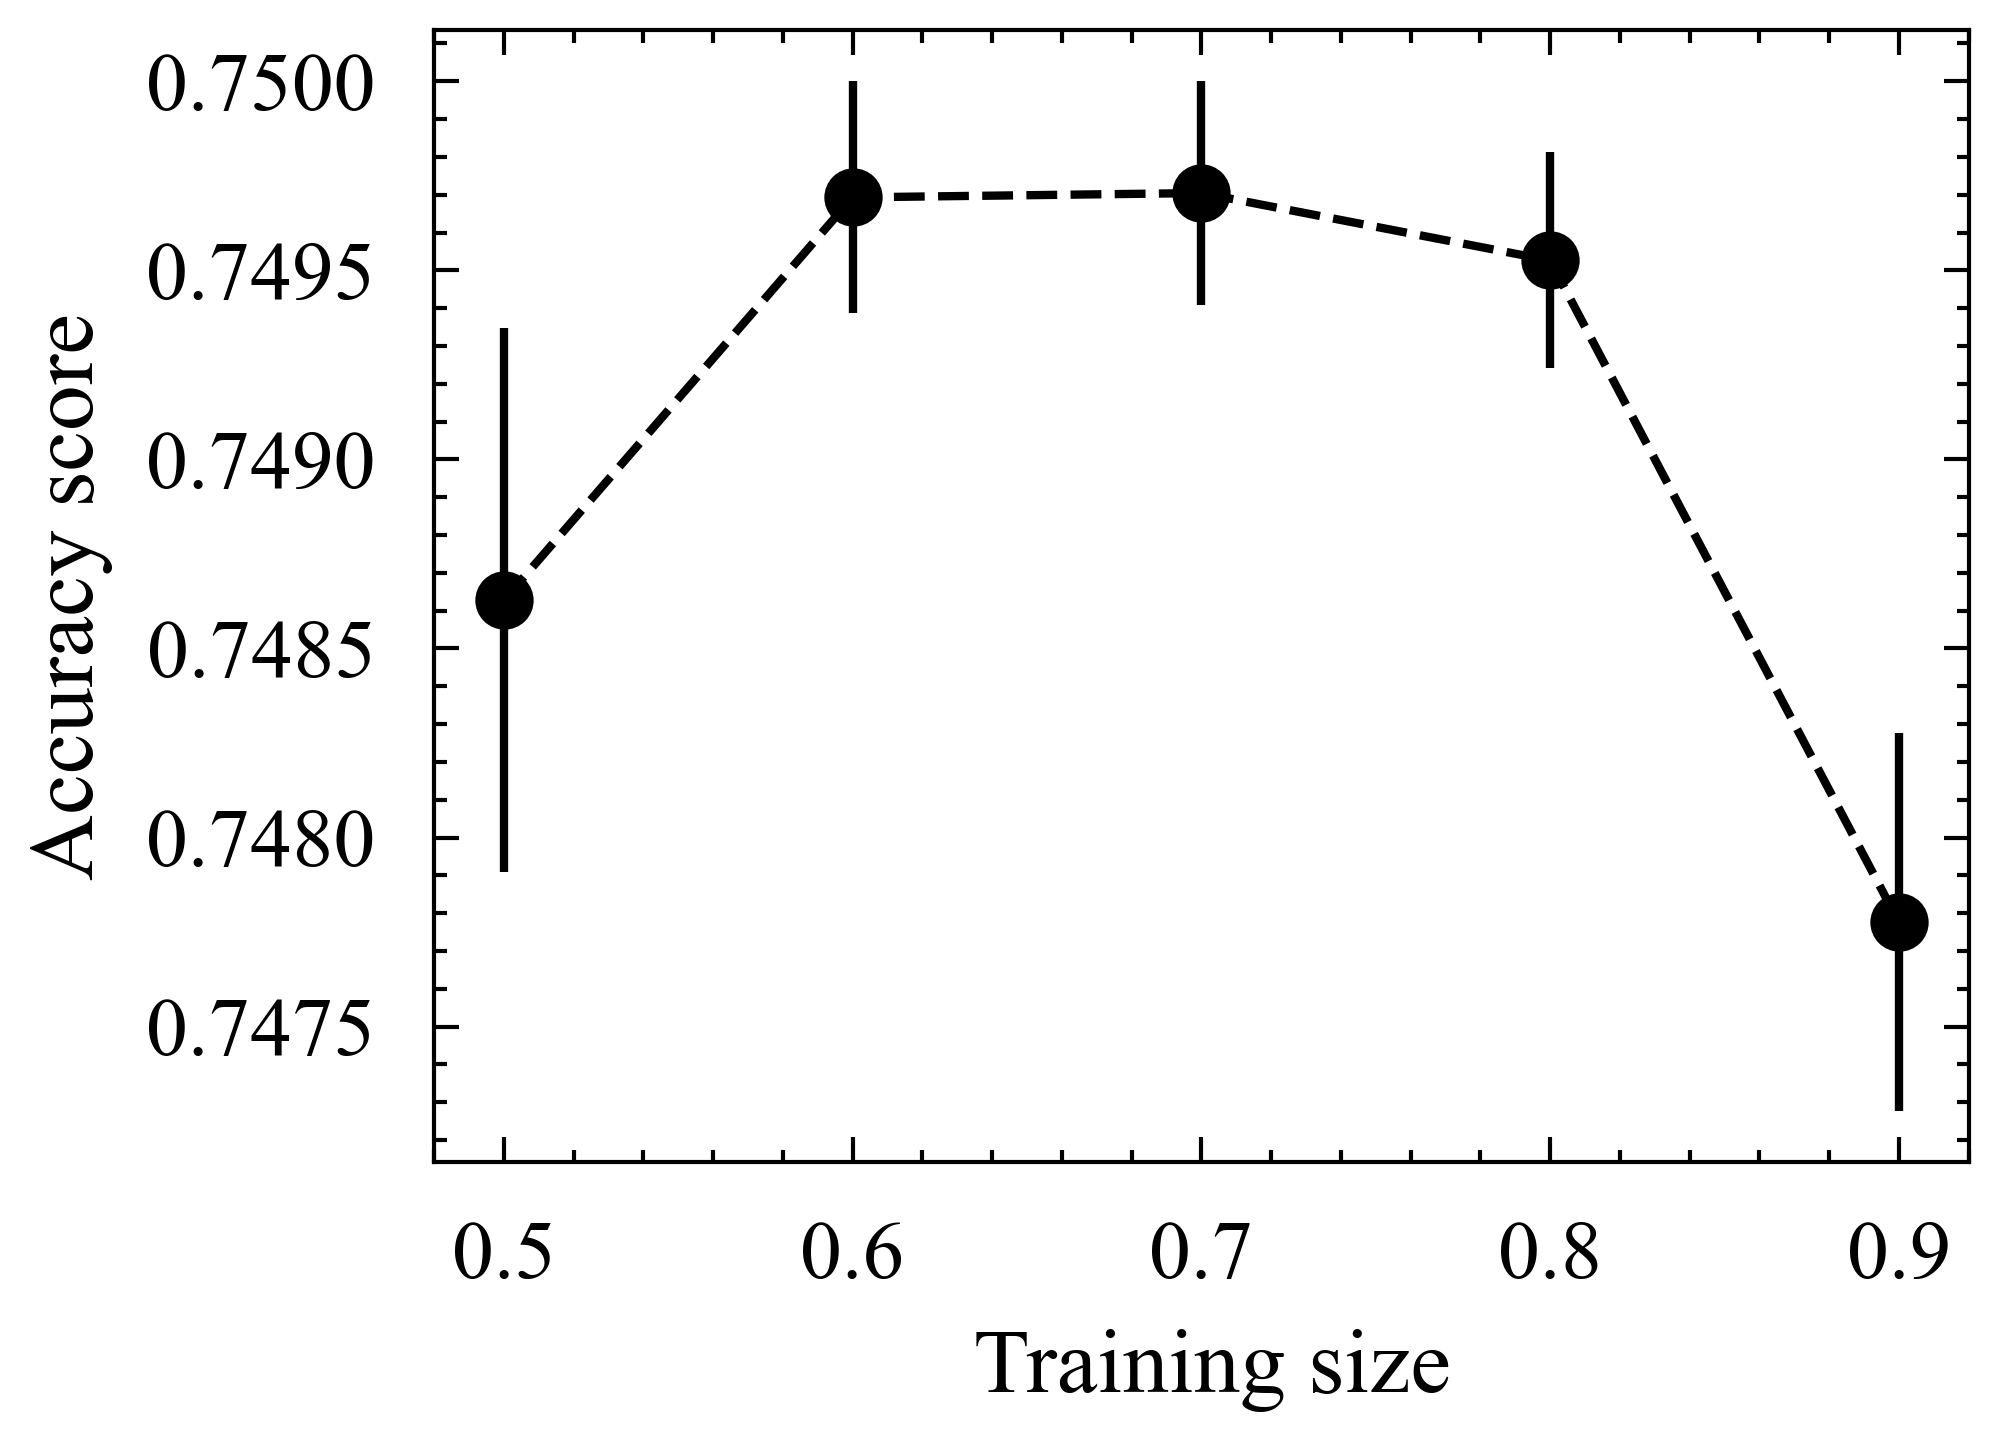

In [96]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL-BOW
#===========================================================================================================================================
unpickled_al_bow = utils.load_pickle_file_to_df('NN_bow_al_trainsize_accuracy_sem_1000ephs',dir_name_e)
plt.plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], 'o')
plt.errorbar(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], yerr = unpickled_al_bow['sem'], markersize=0.5, capsize=20, elinewidth=1, color= 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')

#---- save the figure ----
# filepath = 'outputs/NN-AL-BOW-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

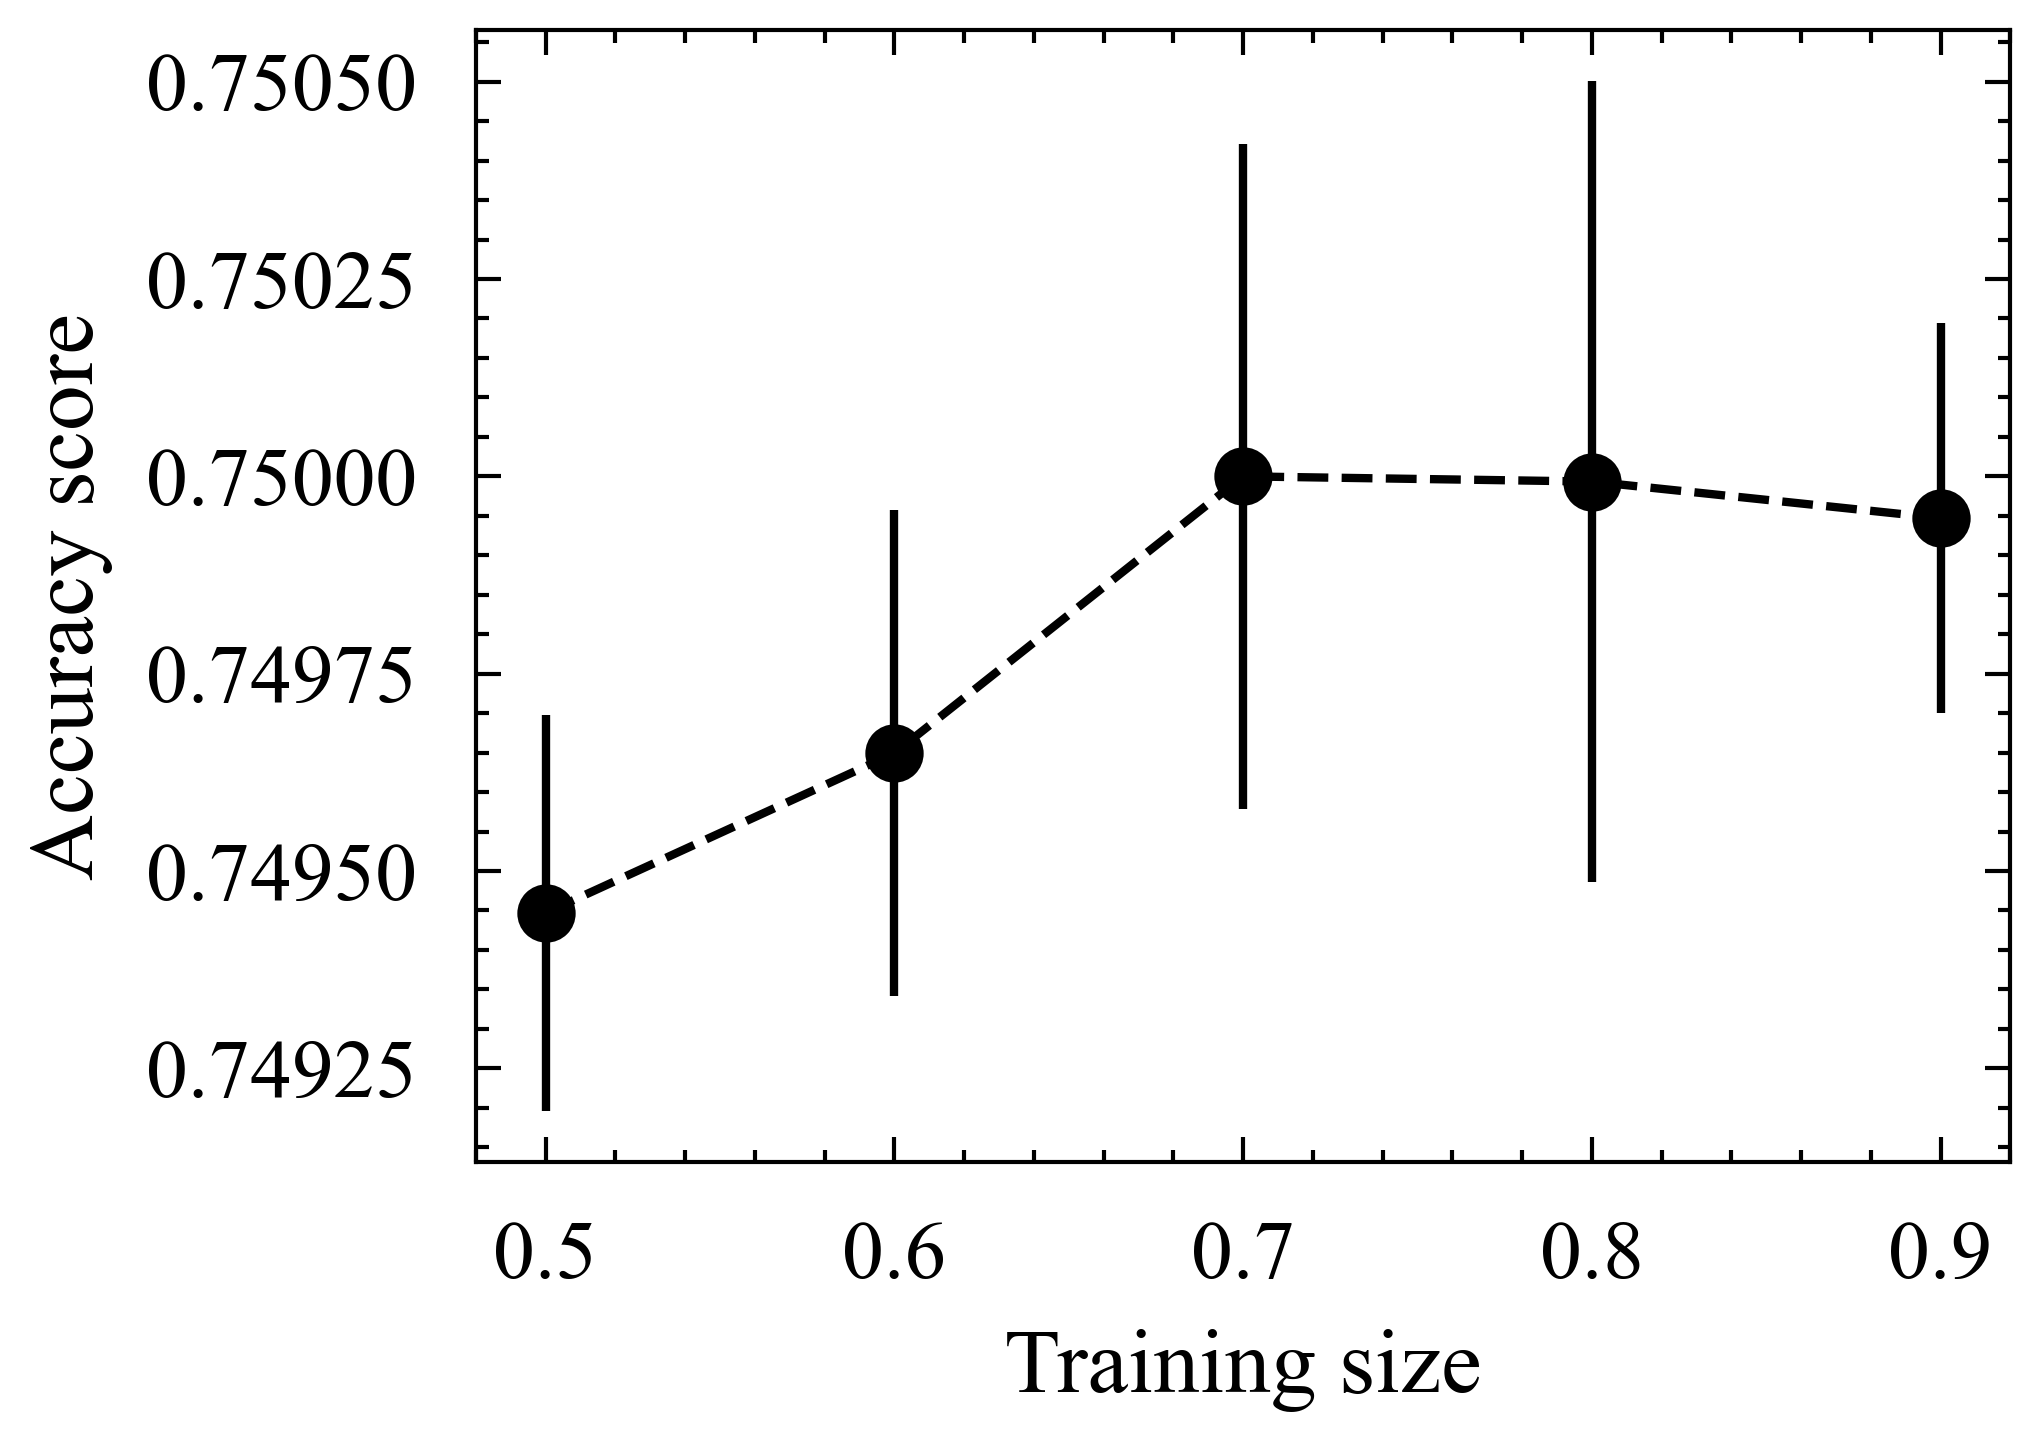

In [97]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL- TFIDF
#===========================================================================================================================================
unpickled_rl_tfidf = utils.load_pickle_file_to_df('NN_tfidf_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)
#----- TTF-IDF, RL, graph ------
plt.plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], 'o')
plt.errorbar(unpickled_rl_tfidf['trainsize'],unpickled_rl_tfidf['accuracy'], yerr = unpickled_rl_bow_df['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.xlabel('Training size')
plt.ylabel('Accuracy score')

# --- save the graph
# filepath = 'outputs/NN-TFIDF-RL-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

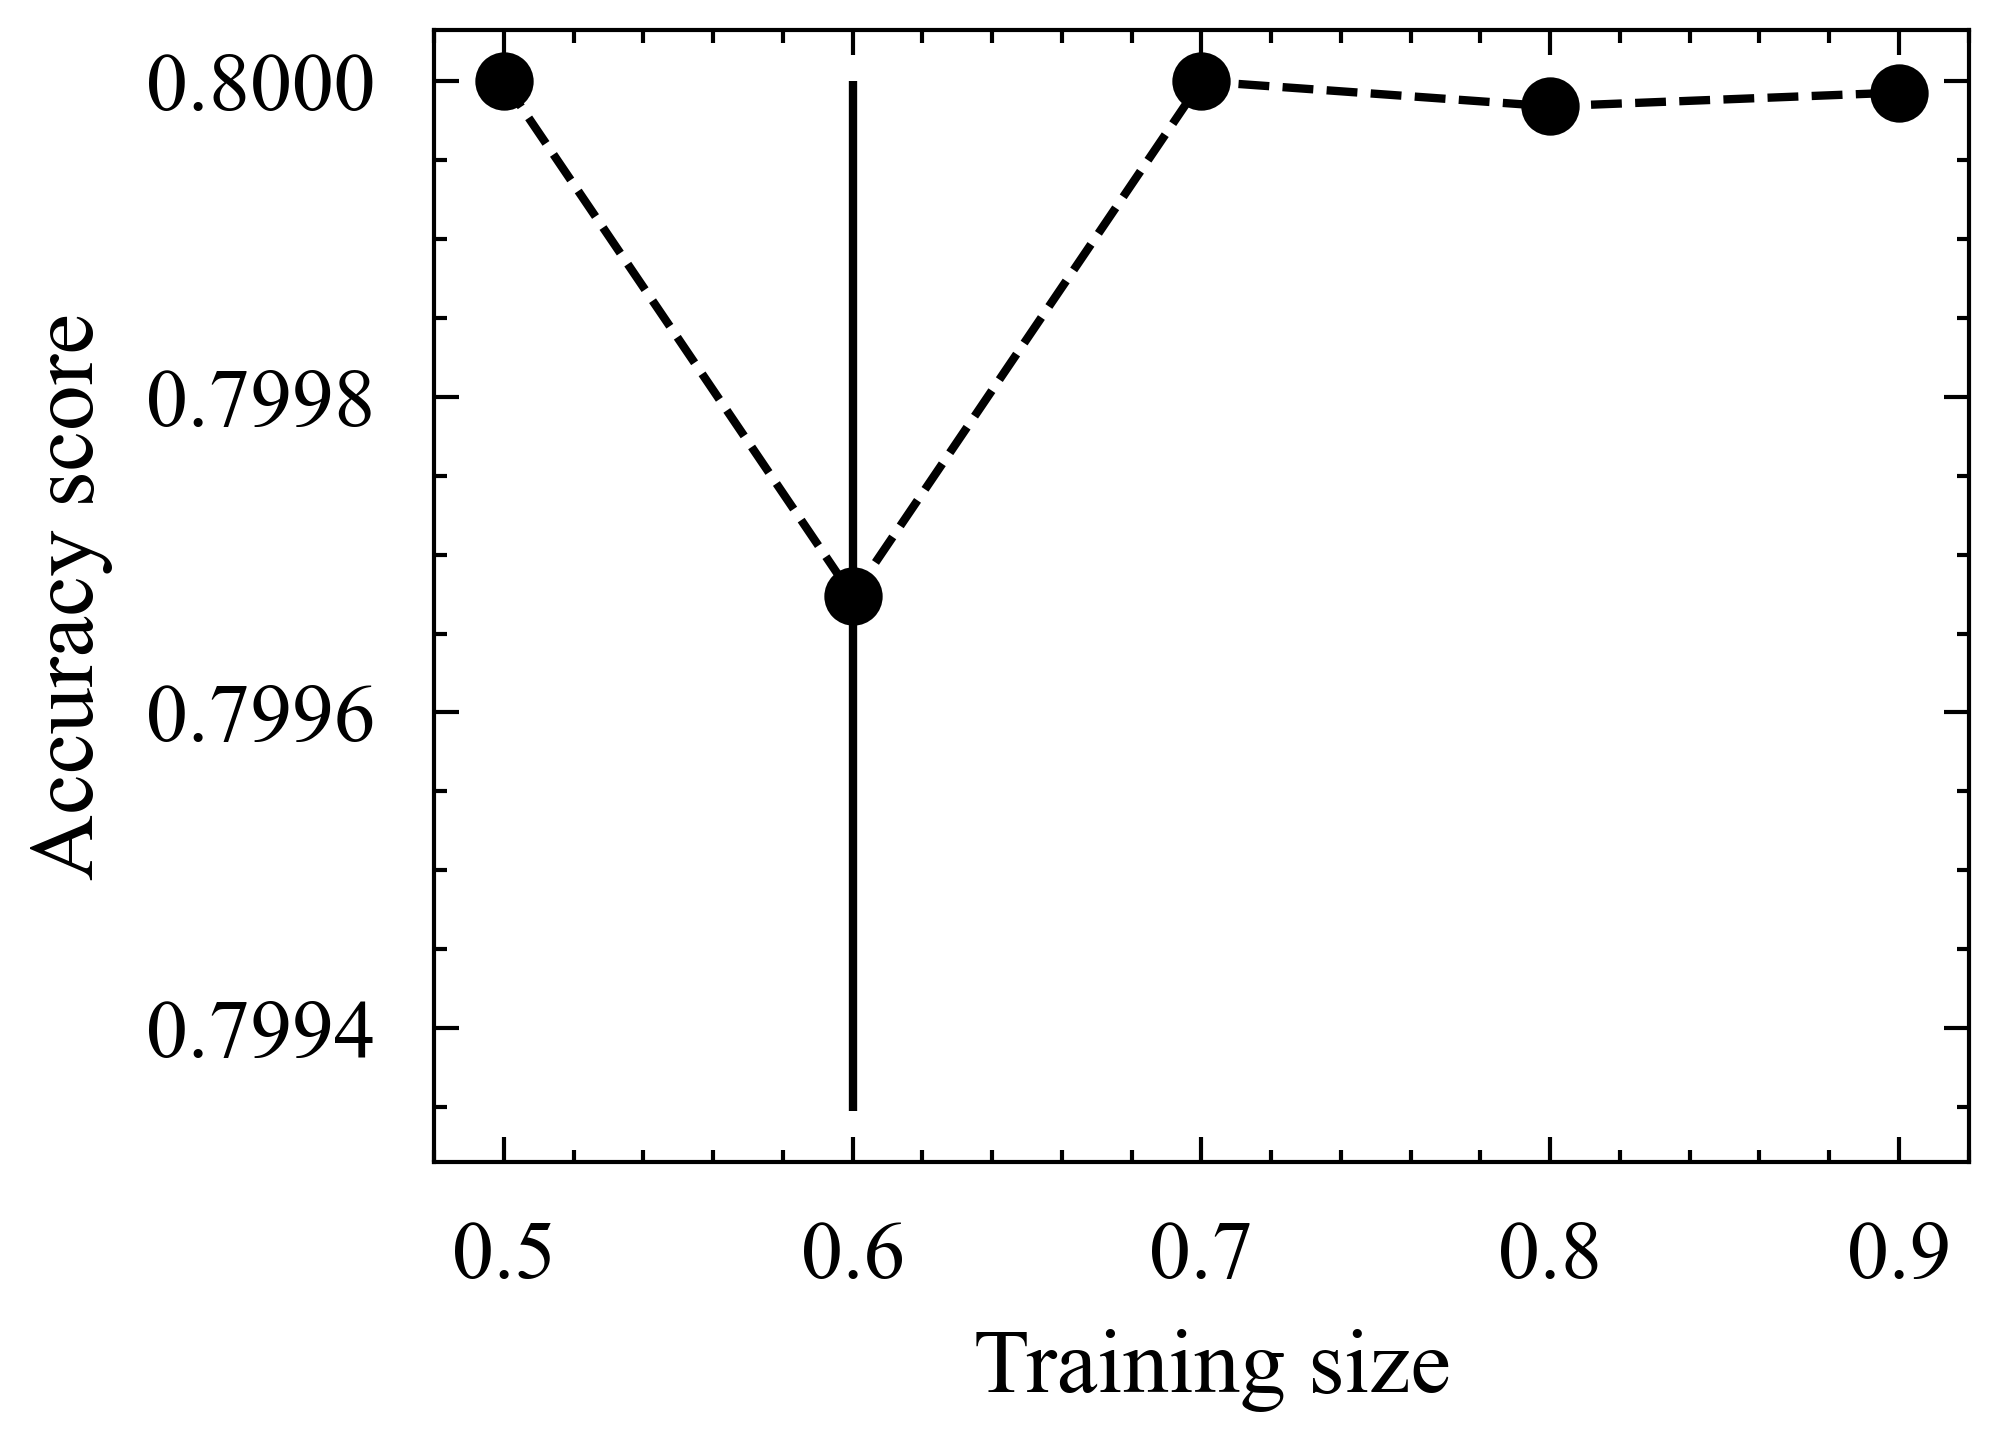

In [98]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL- TFIDF
#===========================================================================================================================================
unpickled_al_tfidf = utils.load_pickle_file_to_df('NN_tfidf_al_trainsize_accuracy_sem_1000ephs',dir_name_e)
#----- tfidf, AL, graph, plotting  ------
plt.plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], 'o')
plt.errorbar(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], yerr = unpickled_al_tfidf['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# # --- save graphs 
# filepath = 'outputs/NN-TFIDF-AL-1000ephs_NEW'
# plt.savefig(filepath)

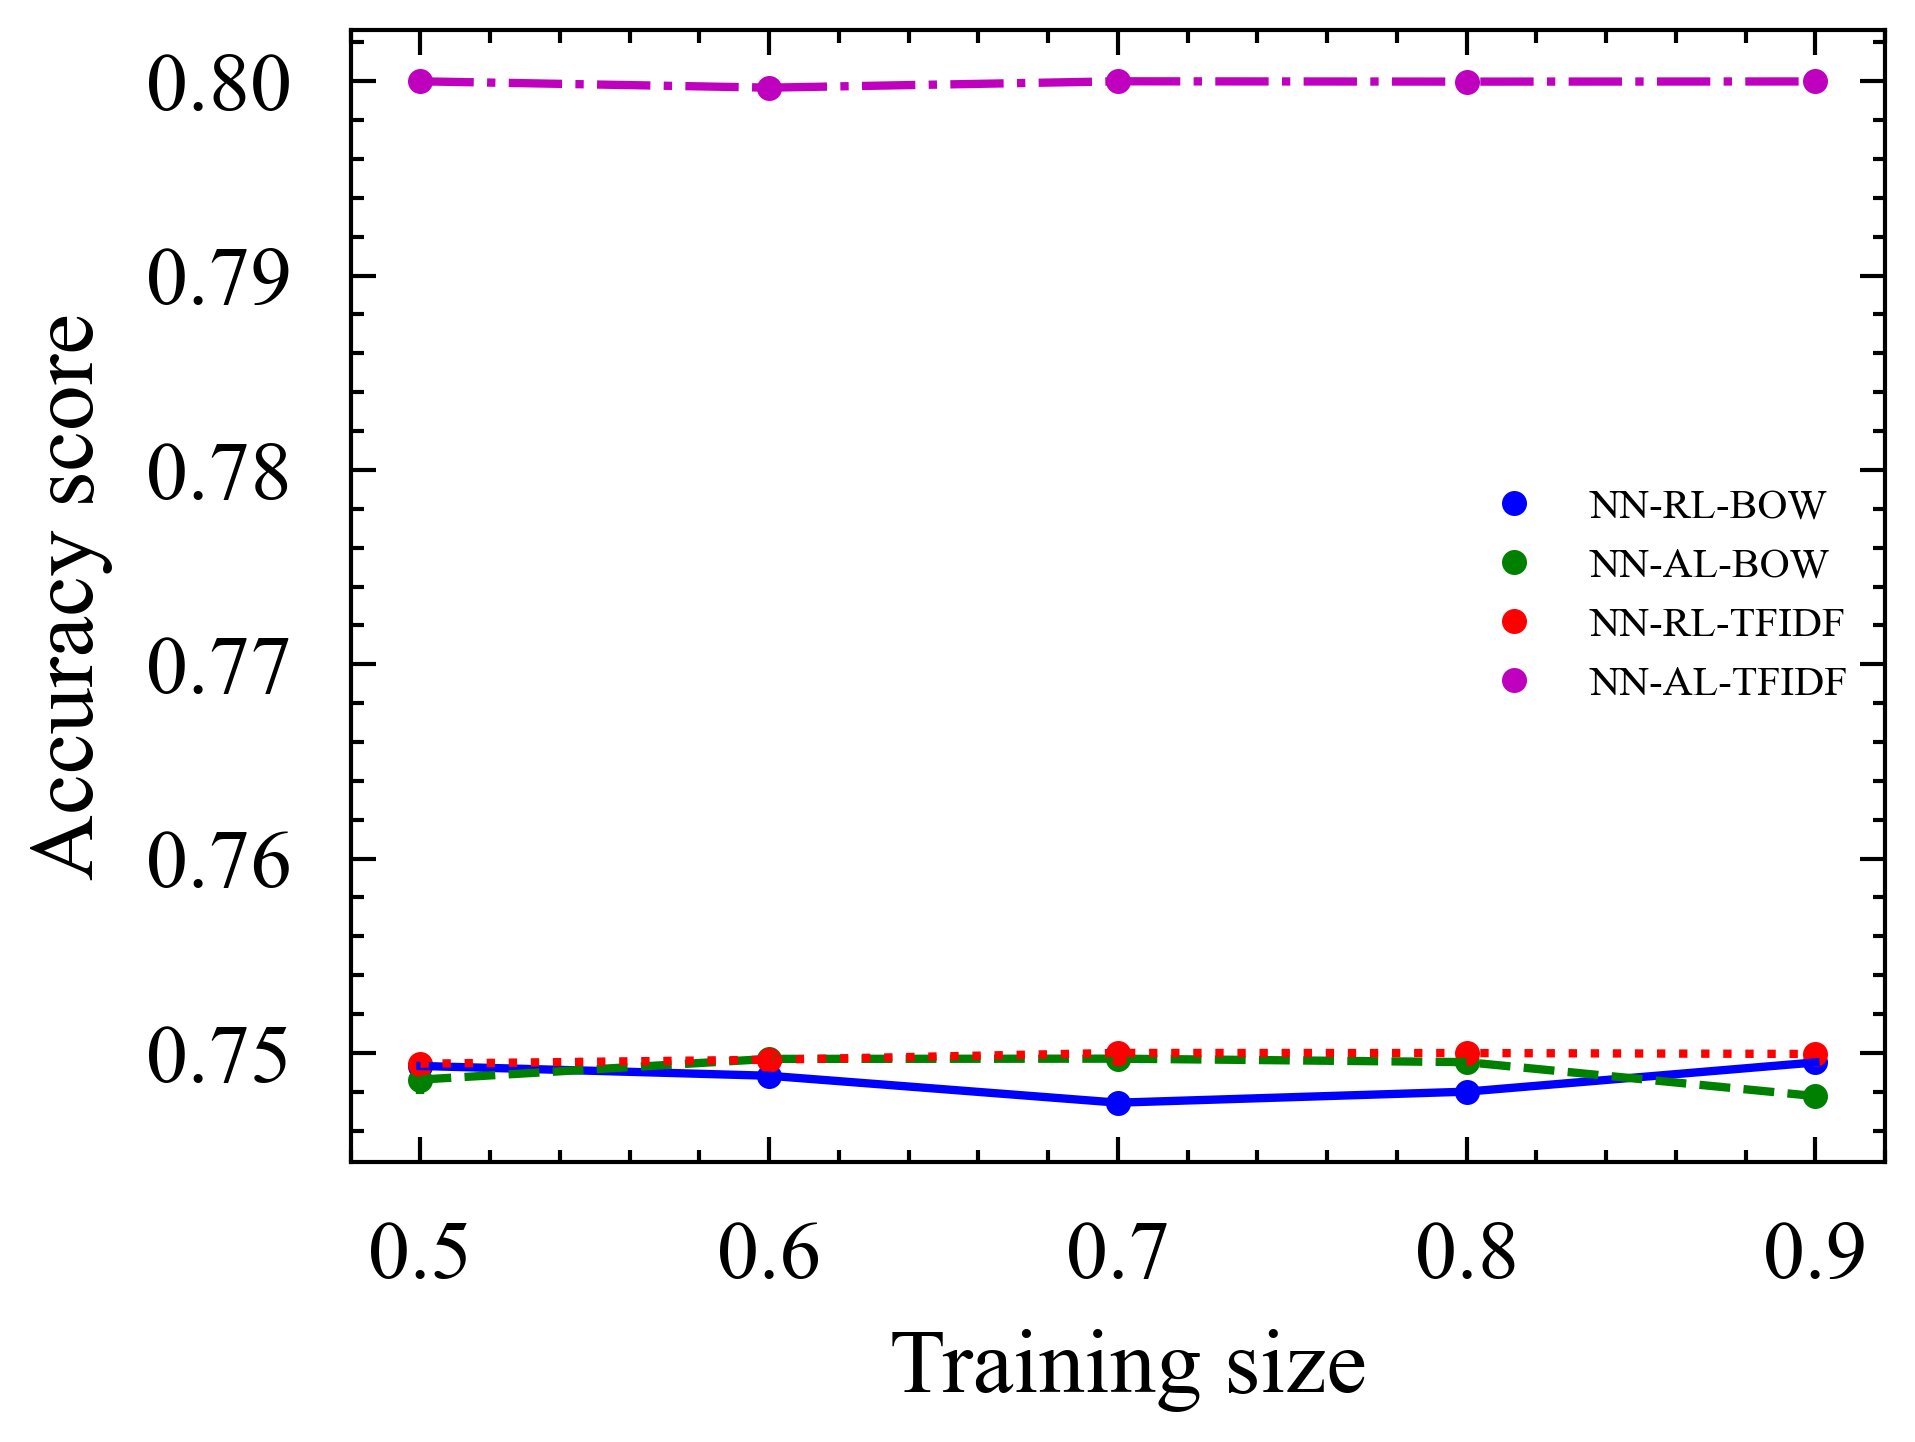

In [100]:
# ----- All NN graphs together 
plt.plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], 'o', label = 'NN-RL-BOW', color = 'b', markersize = 3)
plt.errorbar(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], elinewidth=1, color= 'b' )
plt.plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], 'o', label = 'NN-AL-BOW', color = 'g',markersize = 3)
plt.errorbar(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], yerr = unpickled_al_bow['sem'],  elinewidth=1, color= 'g' )
plt.plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], 'o', label = 'NN-RL-TFIDF', color = 'r',markersize = 3)
plt.errorbar(unpickled_rl_tfidf['trainsize'],unpickled_rl_tfidf['accuracy'], yerr = unpickled_rl_bow_df['sem'],elinewidth=1, color= 'r' )
plt.plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], 'o', label = 'NN-AL-TFIDF', color = 'm', markersize = 3)
plt.errorbar(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], yerr = unpickled_al_tfidf['sem'],  elinewidth=1, color= 'm' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
plt.legend(prop={'size': 5})